In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import scipy.stats as stats


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nslkdd/KDDTest+.arff
/kaggle/input/nslkdd/KDDTest-21.arff
/kaggle/input/nslkdd/KDDTest1.jpg
/kaggle/input/nslkdd/KDDTrain+.txt
/kaggle/input/nslkdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/KDDTest-21.txt
/kaggle/input/nslkdd/KDDTest+.txt
/kaggle/input/nslkdd/KDDTrain+.arff
/kaggle/input/nslkdd/index.html
/kaggle/input/nslkdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/KDDTrain1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.arff
/kaggle/input/nslkdd/nsl-kdd/index.html
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTrain1.jpg


In [2]:
df=pd.read_csv("/kaggle/input/nslkdd/KDDTrain+.txt")
test=pd.read_csv("/kaggle/input/nslkdd/KDDTest+.txt")

In [3]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])
df.columns=columns
test.columns=columns
df_extra=df

In [4]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [5]:
test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [7]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [10]:
df['attack']=df['attack'].apply(lambda x: 0 if x=='normal' else 1)
test['attack']=test['attack'].apply(lambda x:0 if x=='normal' else 1)

In [11]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1,21


duration                          Axes(0.125,0.807358;0.133621x0.0726415)
src_bytes                      Axes(0.285345,0.807358;0.133621x0.0726415)
dst_bytes                       Axes(0.44569,0.807358;0.133621x0.0726415)
land                           Axes(0.606034,0.807358;0.133621x0.0726415)
wrong_fragment                 Axes(0.766379,0.807358;0.133621x0.0726415)
urgent                            Axes(0.125,0.720189;0.133621x0.0726415)
hot                            Axes(0.285345,0.720189;0.133621x0.0726415)
num_failed_logins               Axes(0.44569,0.720189;0.133621x0.0726415)
logged_in                      Axes(0.606034,0.720189;0.133621x0.0726415)
num_compromised                Axes(0.766379,0.720189;0.133621x0.0726415)
root_shell                        Axes(0.125,0.633019;0.133621x0.0726415)
su_attempted                   Axes(0.285345,0.633019;0.133621x0.0726415)
num_root                        Axes(0.44569,0.633019;0.133621x0.0726415)
num_file_creations             Axes(0.

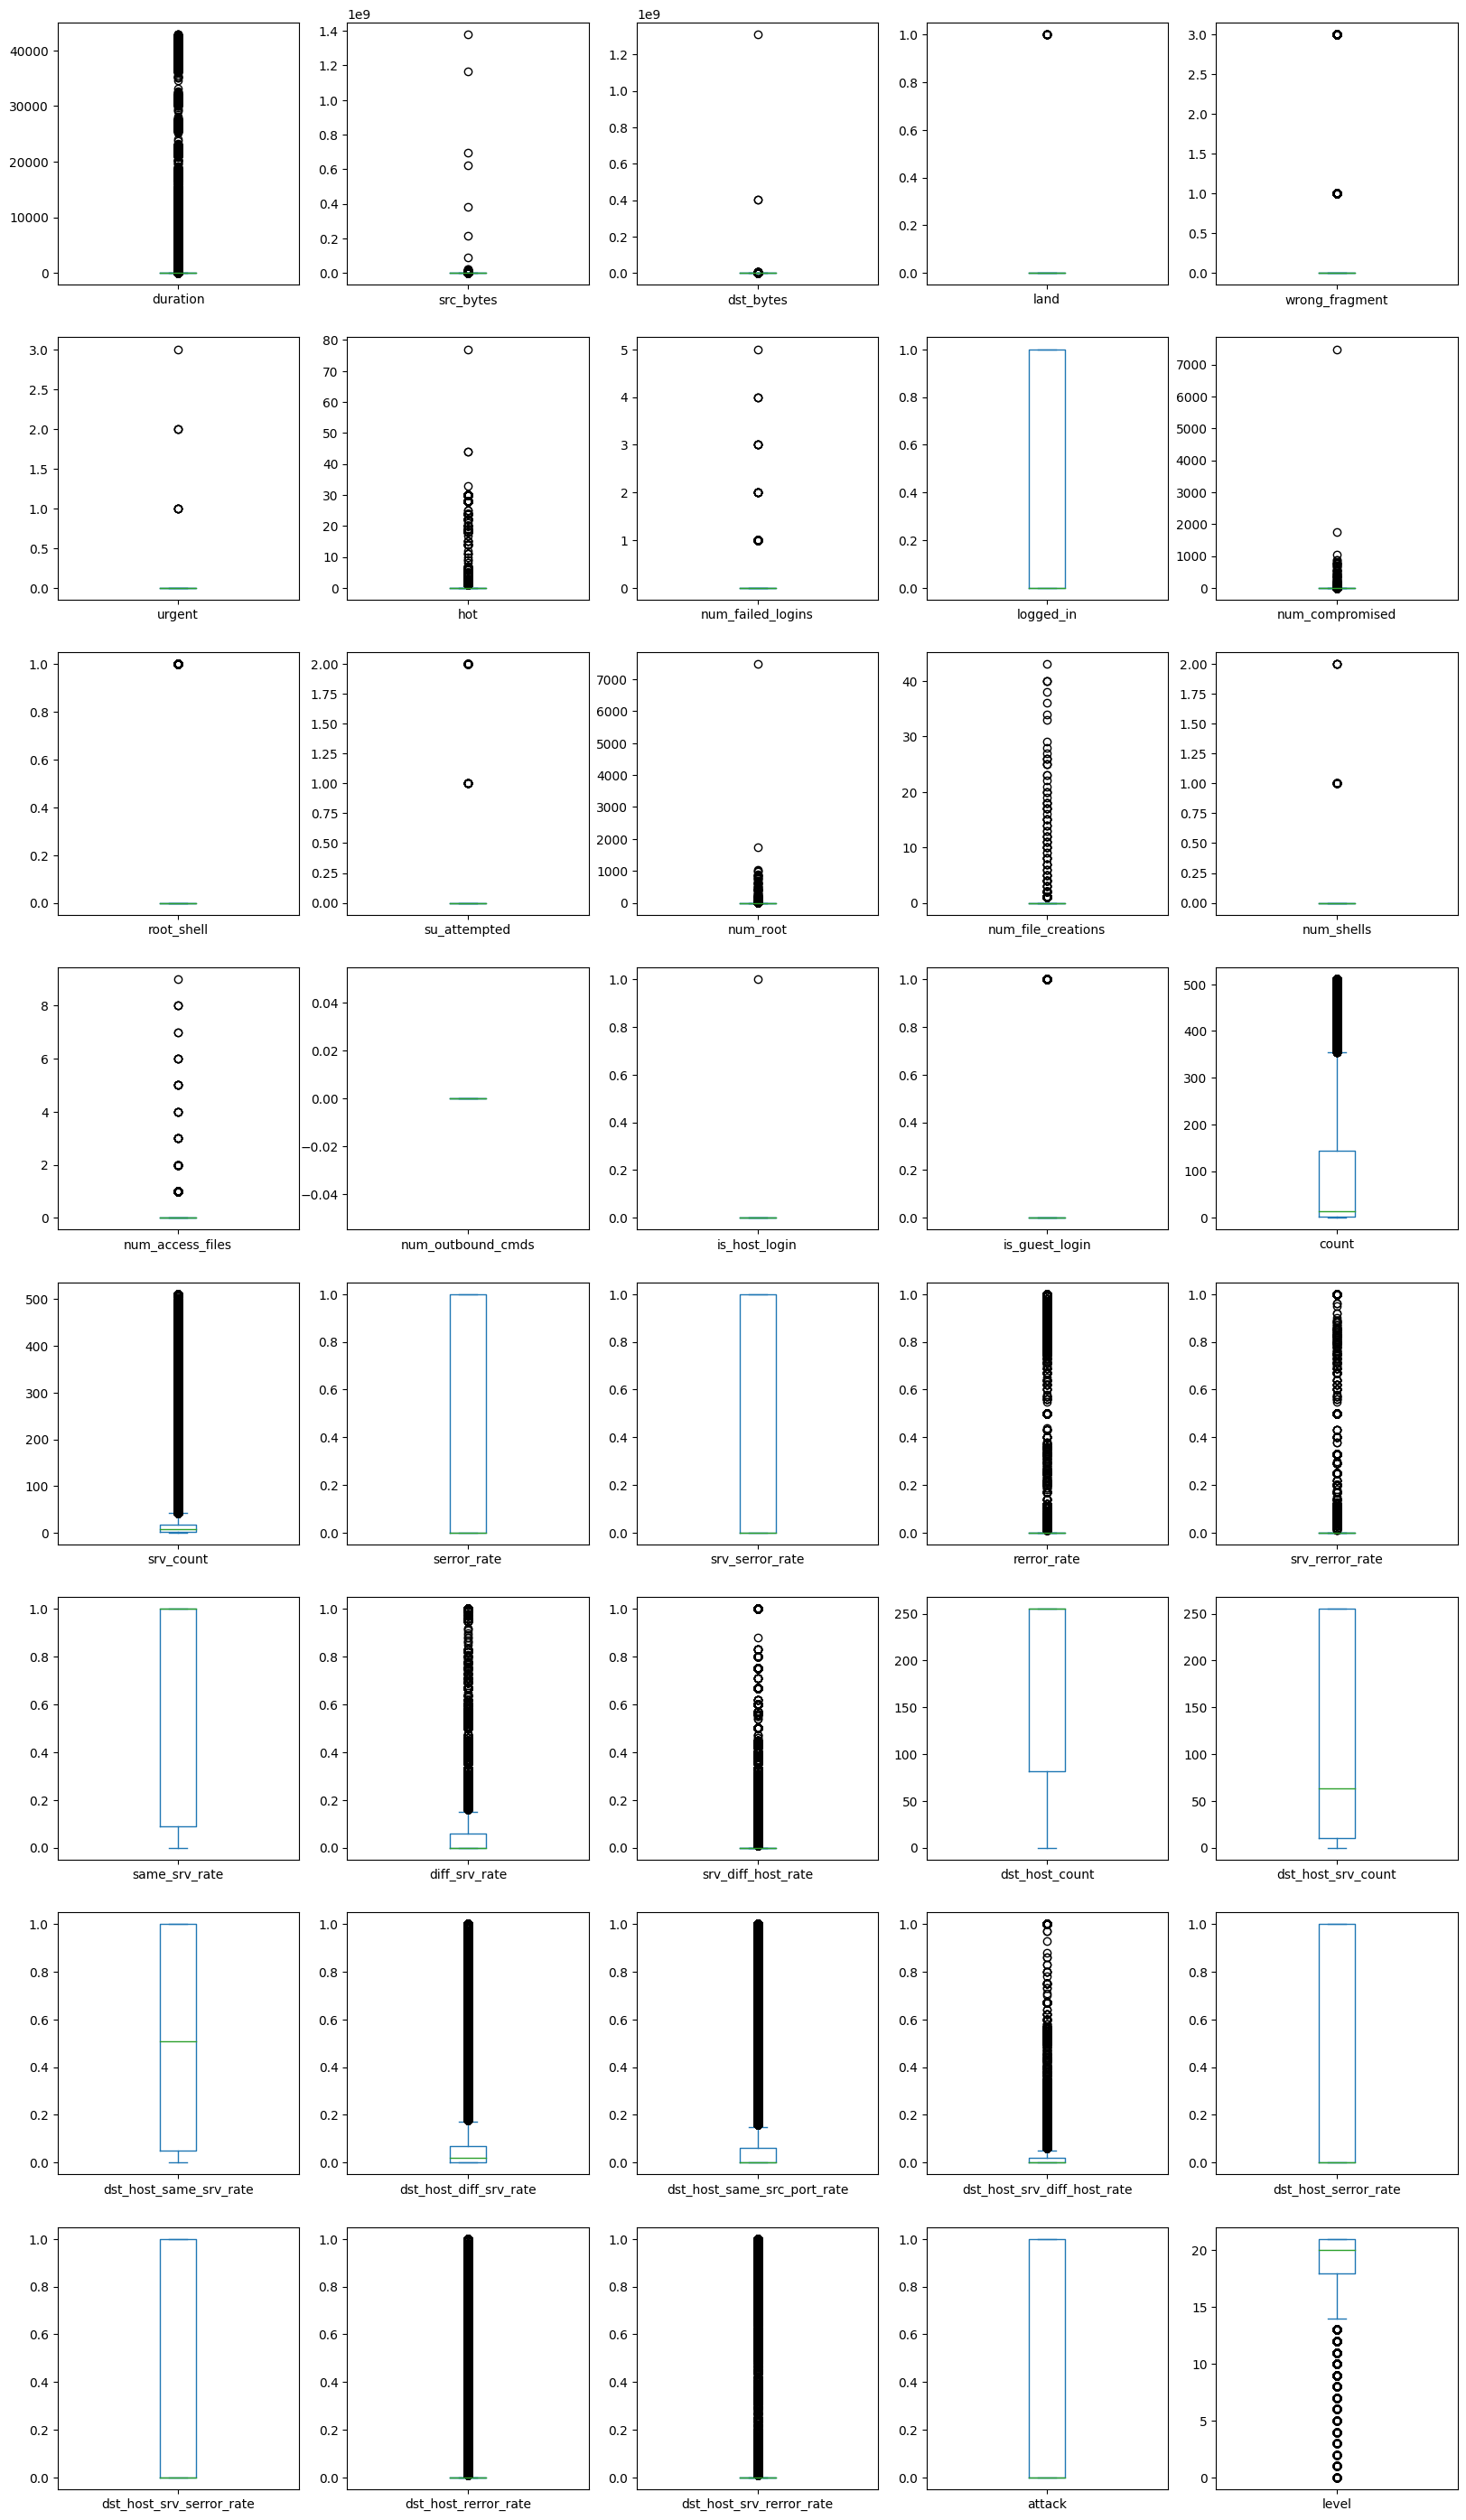

In [12]:
df.plot(kind='box',subplots=True,layout=(9,5),figsize=(20, 40))

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'src_bytes'}>,
        <Axes: title={'center': 'dst_bytes'}>,
        <Axes: title={'center': 'land'}>,
        <Axes: title={'center': 'wrong_fragment'}>],
       [<Axes: title={'center': 'urgent'}>,
        <Axes: title={'center': 'hot'}>,
        <Axes: title={'center': 'num_failed_logins'}>,
        <Axes: title={'center': 'logged_in'}>,
        <Axes: title={'center': 'num_compromised'}>],
       [<Axes: title={'center': 'root_shell'}>,
        <Axes: title={'center': 'su_attempted'}>,
        <Axes: title={'center': 'num_root'}>,
        <Axes: title={'center': 'num_file_creations'}>,
        <Axes: title={'center': 'num_shells'}>],
       [<Axes: title={'center': 'num_access_files'}>,
        <Axes: title={'center': 'num_outbound_cmds'}>,
        <Axes: title={'center': 'is_host_login'}>,
        <Axes: title={'center': 'is_guest_login'}>,
        <Axes: title={'center': 'count'}>],
       [<Axes: titl

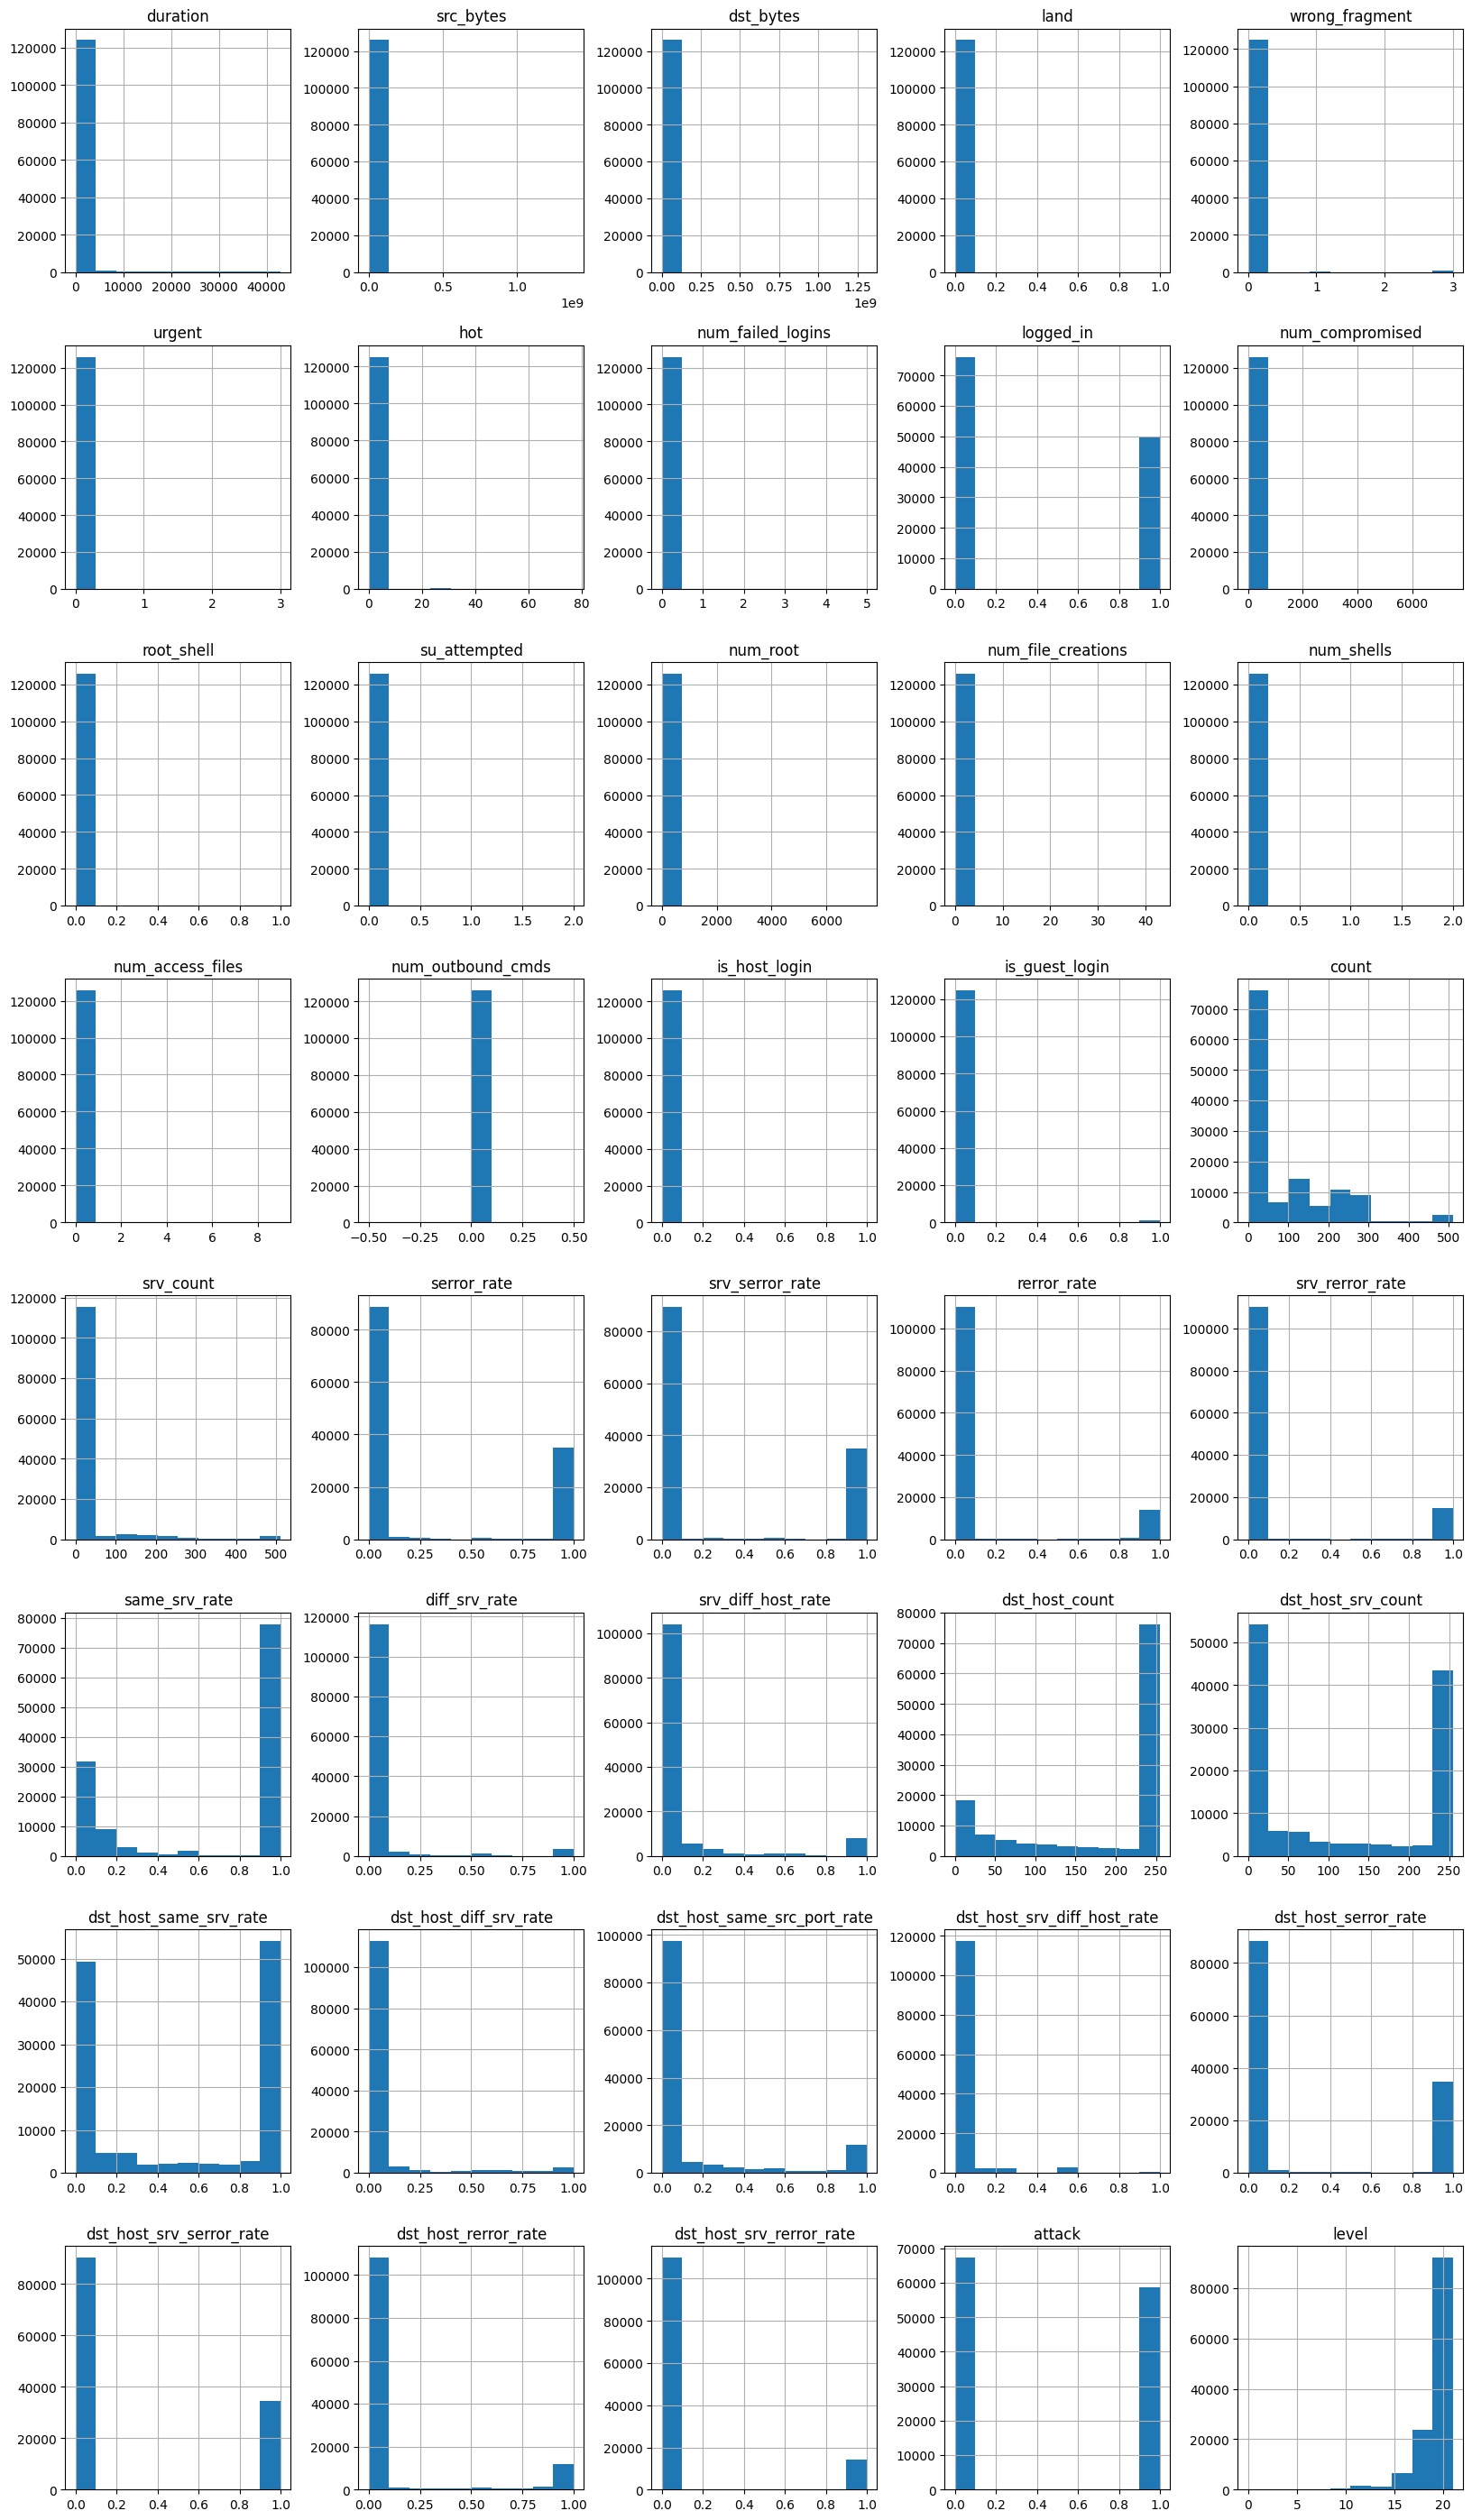

In [13]:
df.hist(layout=(9,5),figsize=(20, 40))


<Axes: xlabel='protocol_type', ylabel='count'>

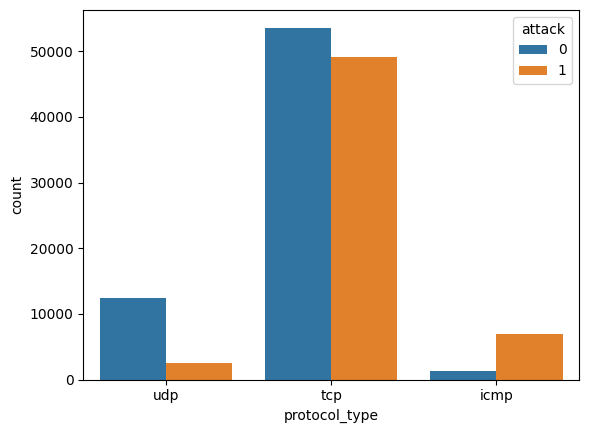

In [14]:
sns.countplot(data=df,x='protocol_type',hue='attack')

<Axes: xlabel='service', ylabel='count'>

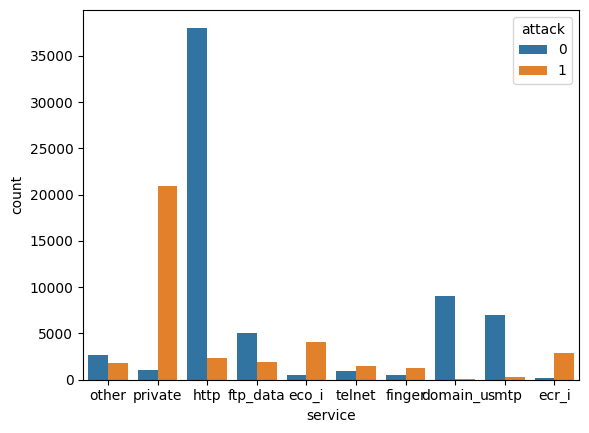

In [15]:
top_services = df['service'].value_counts()[:10].index
df_filtered = df[df['service'].isin(top_services)]
sns.countplot(data=df_filtered,x='service',hue='attack')

<Axes: xlabel='flag', ylabel='count'>

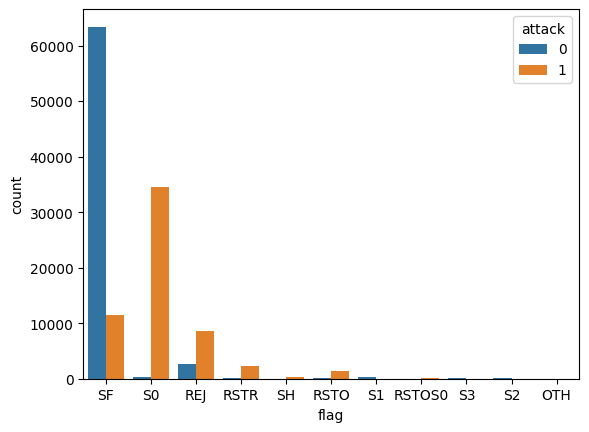

In [16]:
sns.countplot(data=df,x='flag',hue='attack')

<Axes: xlabel='land', ylabel='count'>

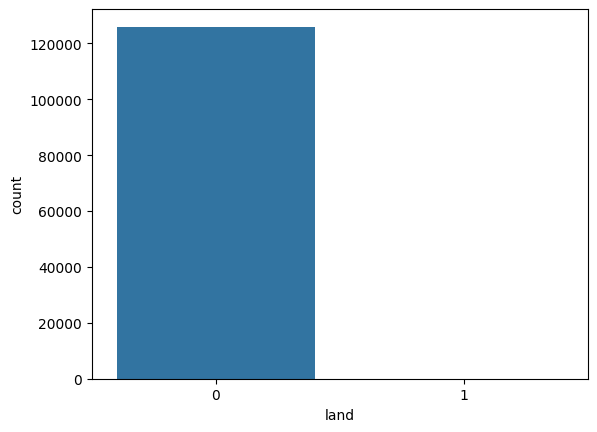

In [17]:
sns.countplot(data=df,x='land')

<Axes: xlabel='urgent', ylabel='count'>

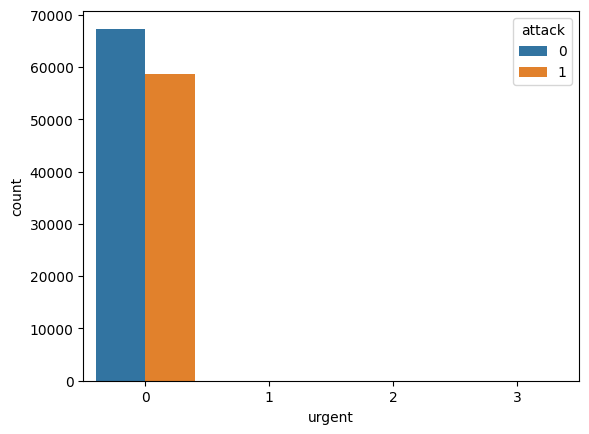

In [18]:
sns.countplot(data=df,x='urgent',hue='attack')

<Axes: xlabel='hot', ylabel='count'>

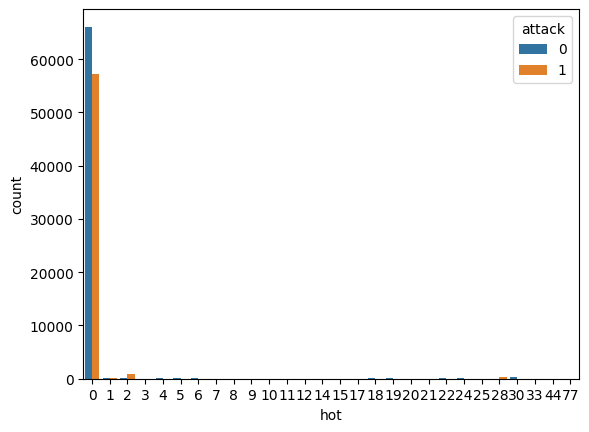

In [19]:
sns.countplot(data=df,x='hot',hue='attack')

<Axes: xlabel='wrong_fragment', ylabel='count'>

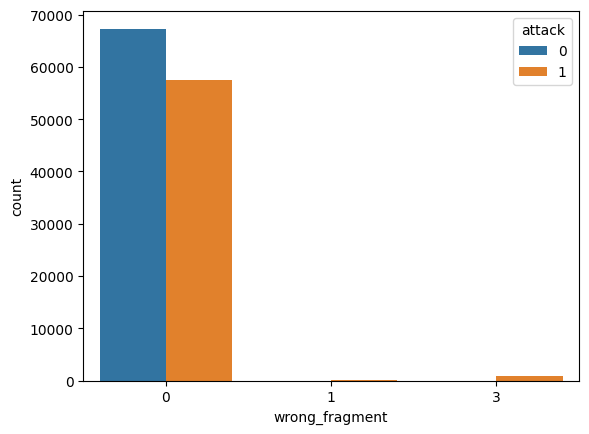

In [20]:
sns.countplot(data=df,x='wrong_fragment',hue='attack')

<Axes: xlabel='num_failed_logins', ylabel='count'>

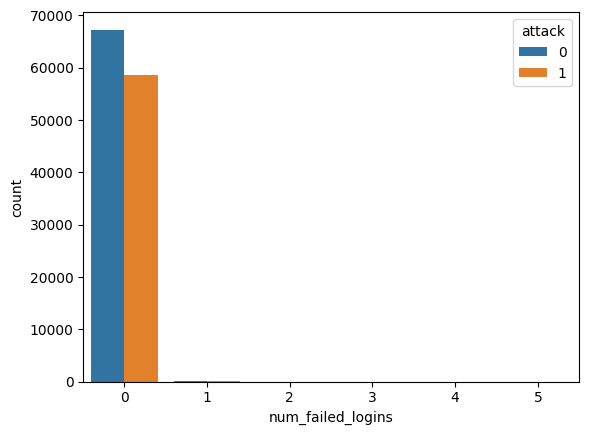

In [21]:
sns.countplot(data=df,x='num_failed_logins',hue='attack')

<Axes: xlabel='logged_in', ylabel='count'>

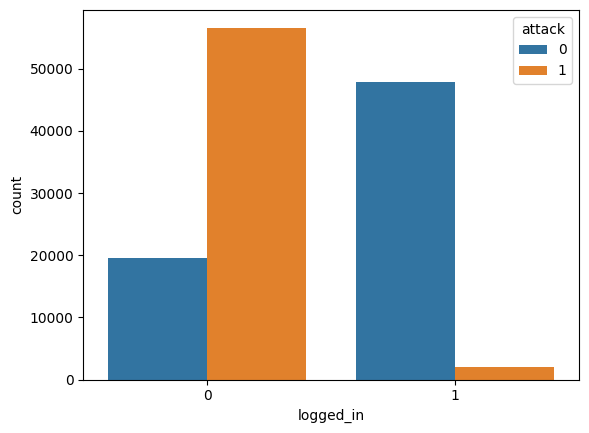

In [22]:
sns.countplot(data=df,x='logged_in',hue='attack')

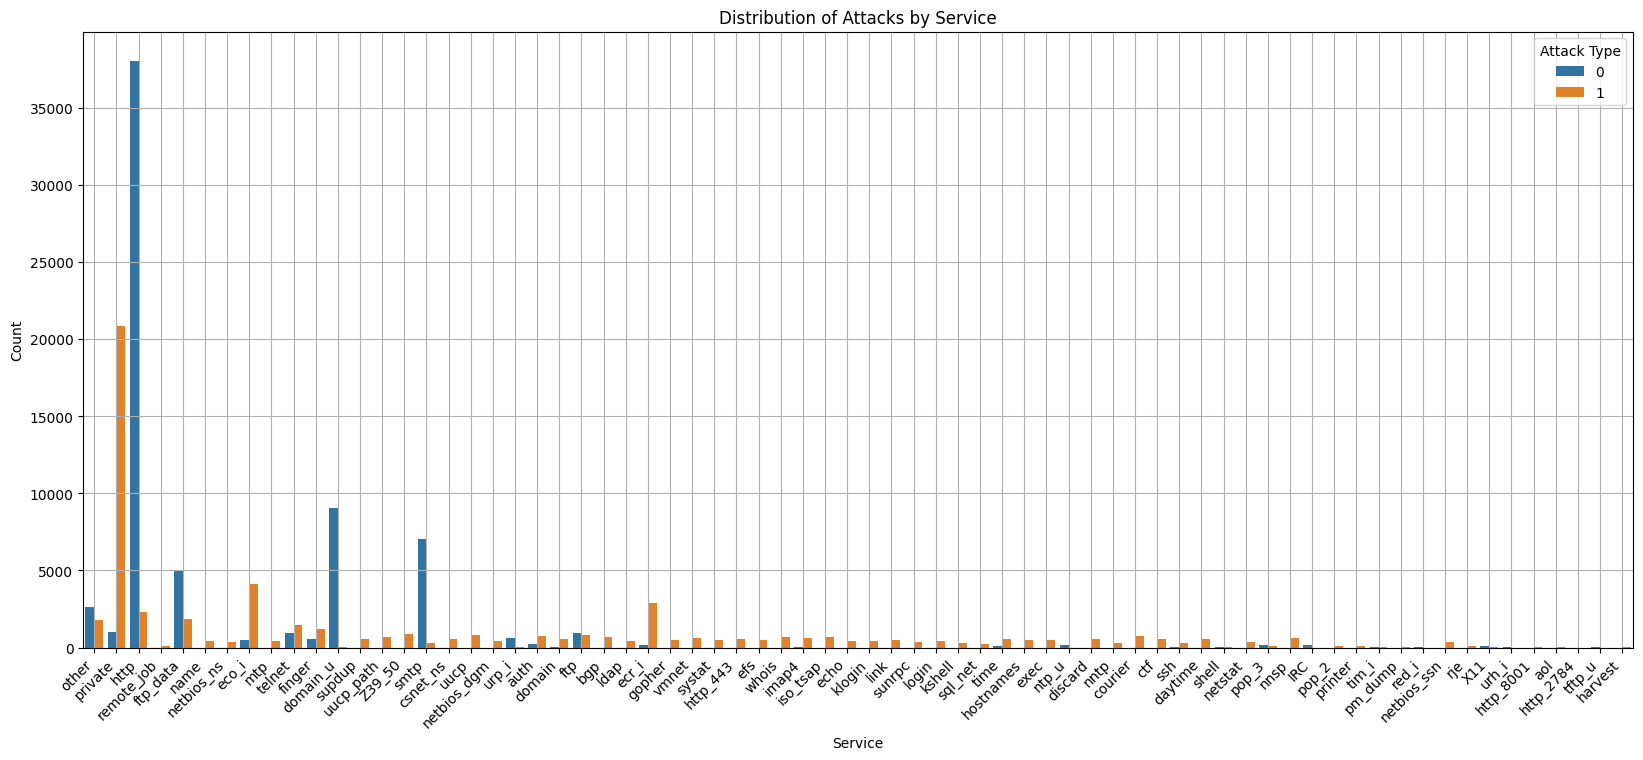

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8)) 
ax = sns.countplot(x='service', hue='attack', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

In [24]:
counts = df['service'].value_counts()
less_than_50 = counts[counts <= 100]
print(less_than_50,len(less_than_50))


service
rje           86
remote_job    78
pop_2         78
X11           73
printer       69
shell         65
urh_i         10
tim_i          8
red_i          8
pm_dump        5
tftp_u         3
http_8001      2
aol            2
harvest        2
http_2784      1
Name: count, dtype: int64 15


In [25]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,20


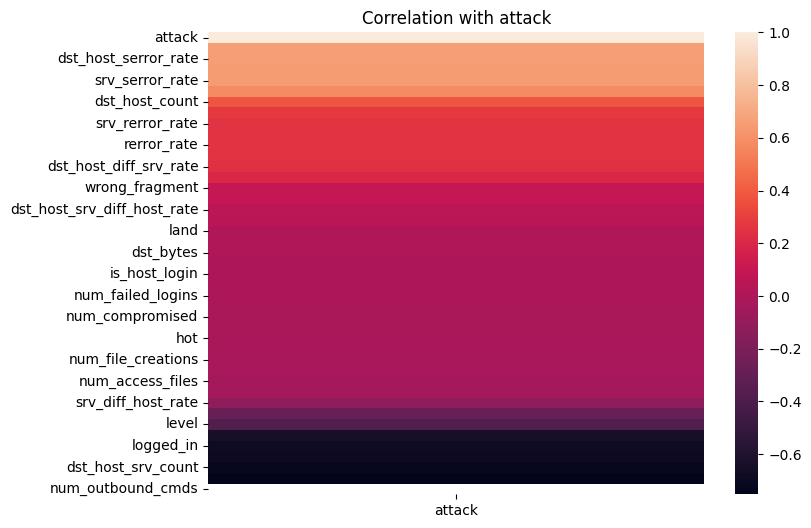

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_copy=df.copy()
df_copy['protocol_type'] = label_encoder.fit_transform(df['protocol_type'])
df_copy['service'] = label_encoder.fit_transform(df['service'])
df_copy['flag'] = label_encoder.fit_transform(df['flag'])




correlation_matrix = df_copy.corr()

target_column = 'attack'
target_correlations = correlation_matrix[[target_column]].sort_values(by=target_column, ascending=False)

# Plot the target column correlations
plt.figure(figsize=(8, 6))
sns.heatmap(target_correlations)
plt.title(f'Correlation with {target_column}')
plt.show()


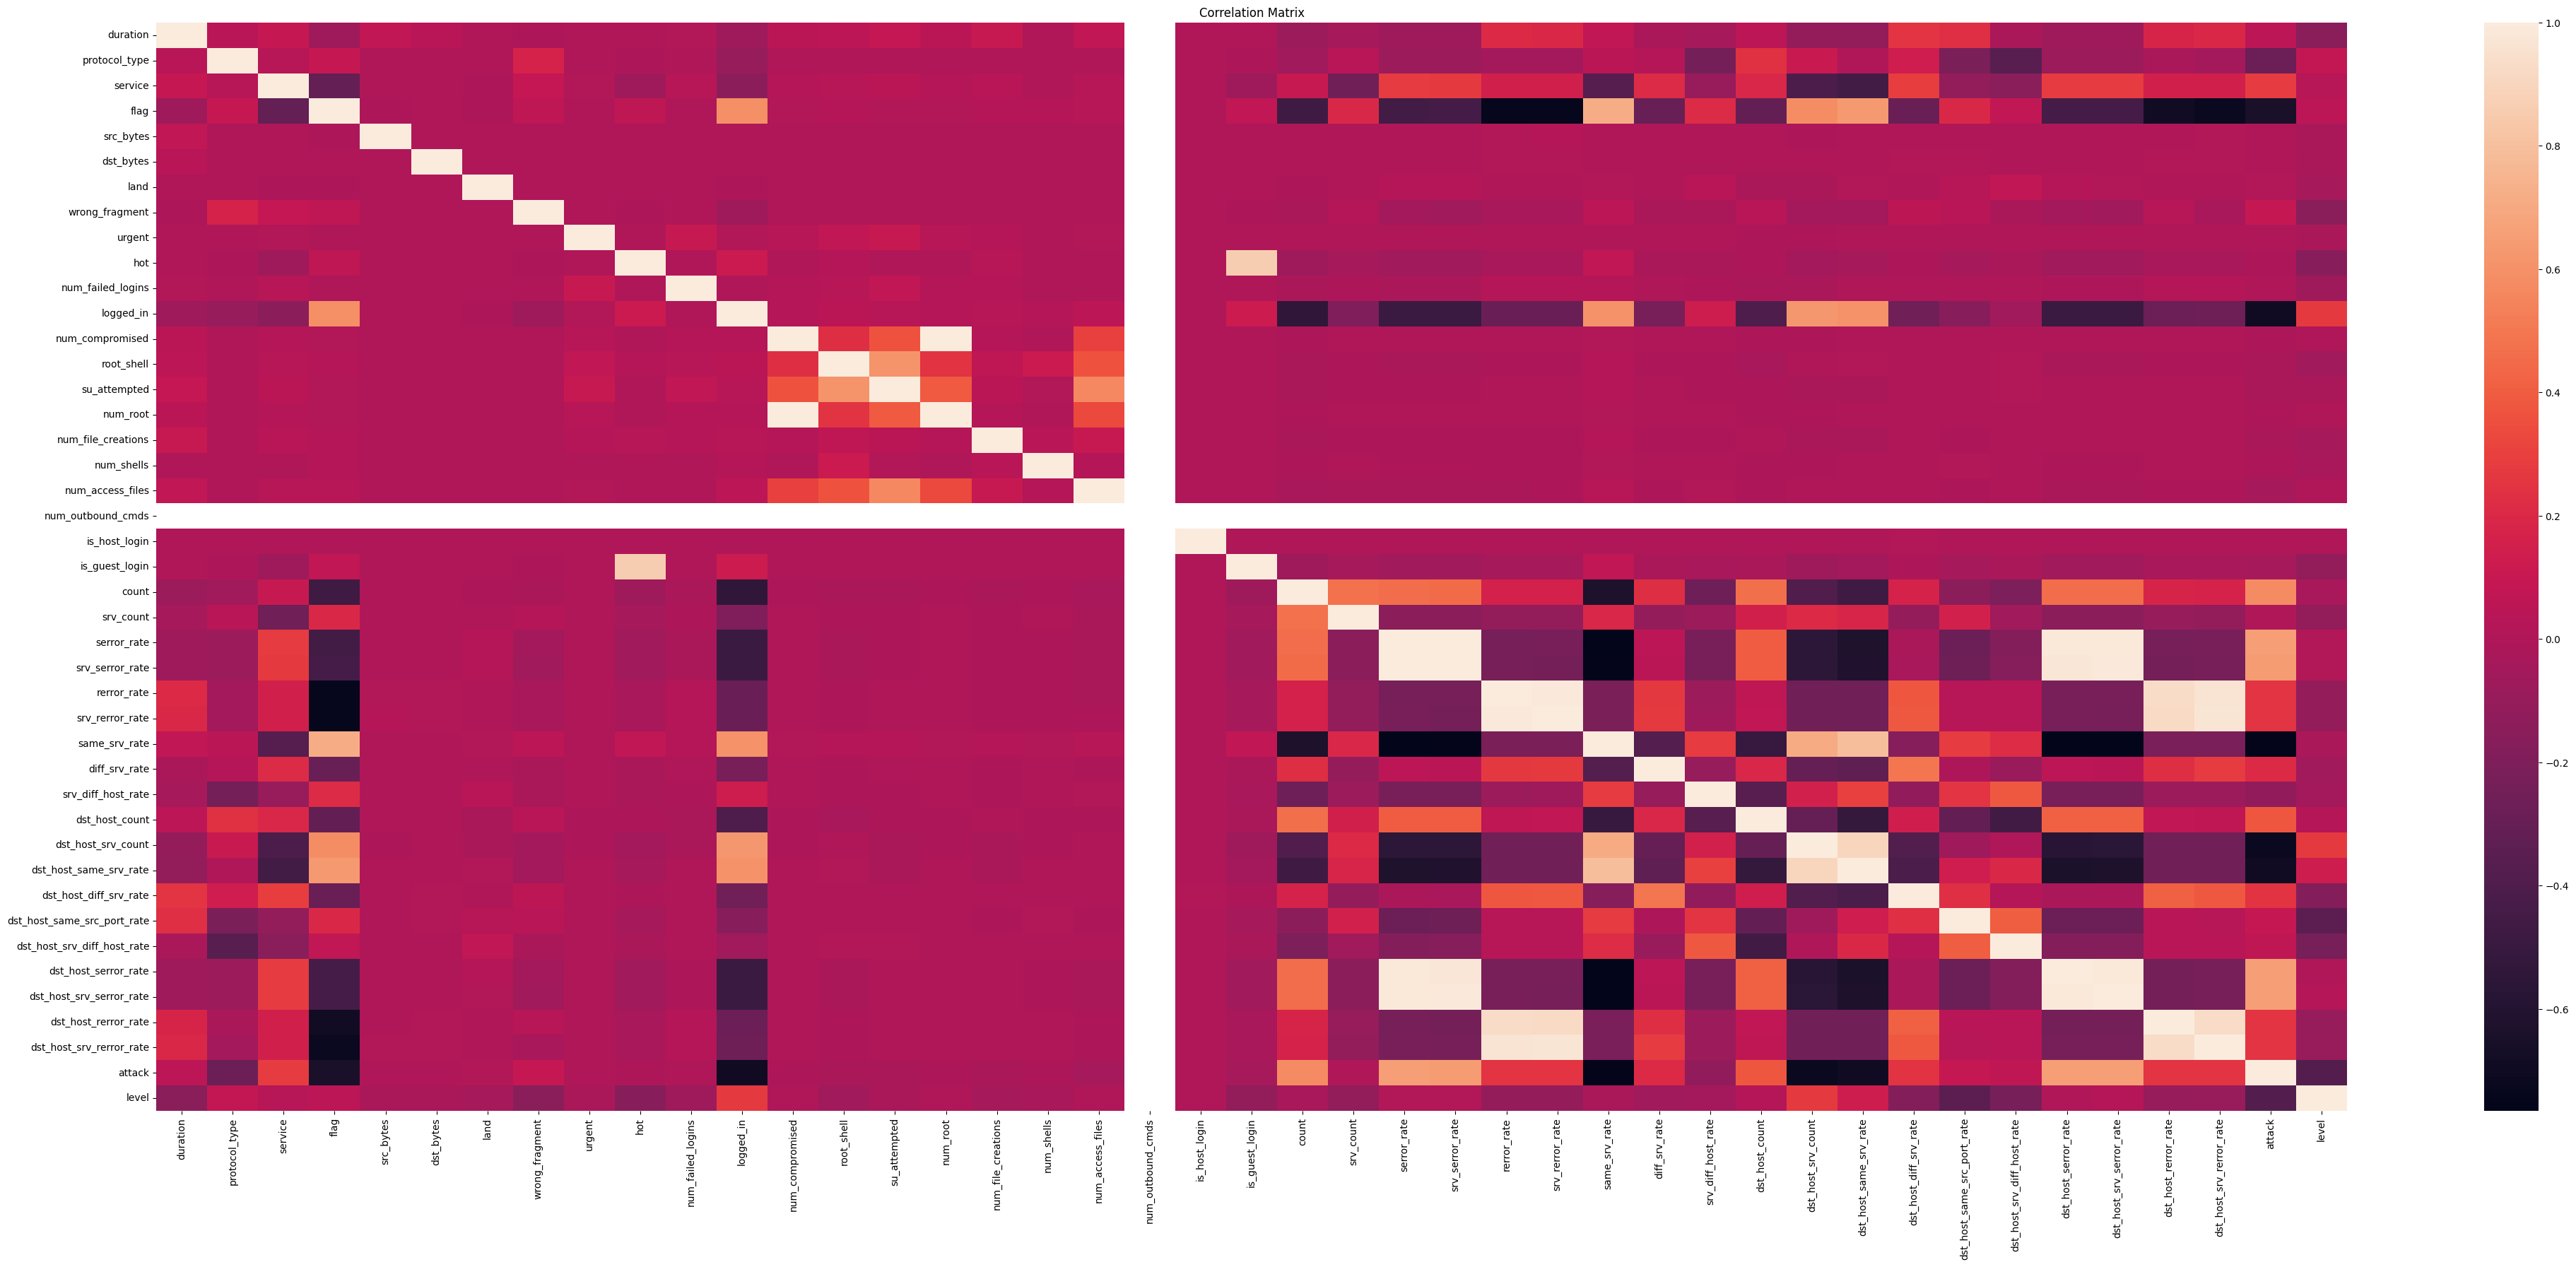

In [27]:
from sklearn.metrics import confusion_matrix

df_encoded = pd.get_dummies(df)
plt.figure(figsize=(50, 20))
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()

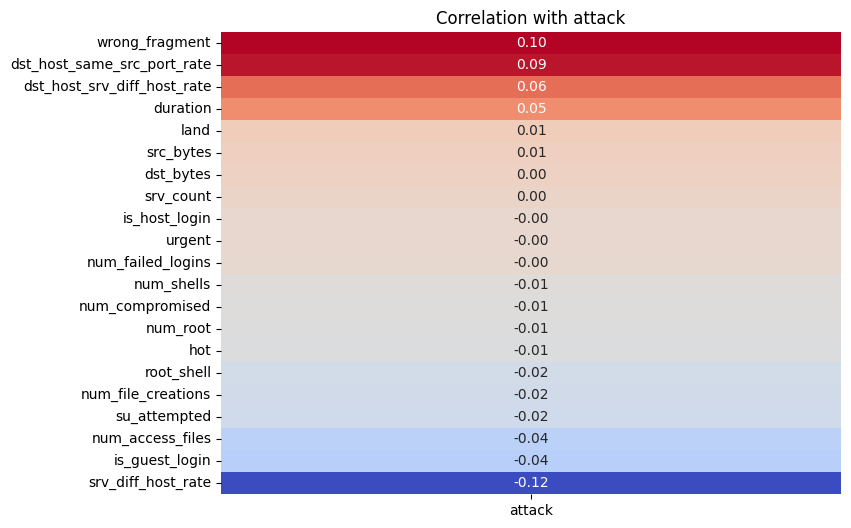

Index(['wrong_fragment', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'duration', 'land', 'src_bytes',
       'dst_bytes', 'srv_count', 'is_host_login', 'urgent',
       'num_failed_logins', 'num_shells', 'num_compromised', 'num_root', 'hot',
       'root_shell', 'num_file_creations', 'su_attempted', 'num_access_files',
       'is_guest_login', 'srv_diff_host_rate'],
      dtype='object')


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import FeatureHasher

correlation_matrix = df_copy.corr()

target_column = 'attack'
target_correlations = correlation_matrix[[target_column]].sort_values(by=target_column, ascending=False)

filtered_correlations = target_correlations[(target_correlations[target_column] >= -0.2) & (target_correlations[target_column] <= 0.2)]

columns_to_discard = filtered_correlations.index


plt.figure(figsize=(8, 6))
sns.heatmap(filtered_correlations, annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
plt.title(f'Correlation with {target_column}')
plt.show()
print(columns_to_discard)

In [29]:
columns_to_discard=columns_to_discard.tolist()


In [30]:
columns_to_discard

['wrong_fragment',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'duration',
 'land',
 'src_bytes',
 'dst_bytes',
 'srv_count',
 'is_host_login',
 'urgent',
 'num_failed_logins',
 'num_shells',
 'num_compromised',
 'num_root',
 'hot',
 'root_shell',
 'num_file_creations',
 'su_attempted',
 'num_access_files',
 'is_guest_login',
 'srv_diff_host_rate']

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler,FunctionTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,chi2


In [32]:
X_train=df.iloc[:,:41]
y_train=df.iloc[:,41:42]
X_test=test.iloc[:,:41]
y_test=test.iloc[:,41:42]

In [33]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

print(numerical_cols)

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


In [34]:
categorical_cols

Index(['protocol_type', 'service', 'flag'], dtype='object')

In [35]:
num_cols=[]
cat_cols=[]

for x in categorical_cols:
    if x  not in columns_to_discard:
        cat_cols.append(x)

for x in numerical_cols:
    if x not in columns_to_discard:
        num_cols.append(x)
        
print(num_cols)
print(cat_cols)

['logged_in', 'num_outbound_cmds', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
['protocol_type', 'service', 'flag']


In [36]:
def custom_preprocessing(X):
    y=X.drop(columns=columns_to_discard)
#     X['service']=X['service'].apply(lambda x: 'other' if x in ls else x)
    return y
    

In [37]:
def convert_to_dense(X):
    y=X.toarray()
    return y

In [38]:
ct = ColumnTransformer(
    [ ('onehot', OneHotEncoder(), cat_cols),
        ('standardscaler', StandardScaler(),num_cols )
   ],    remainder='passthrough'  

)


In [39]:
trf3 = RandomForestClassifier(max_leaf_nodes=5)
trf4=DecisionTreeClassifier()
trf5=LogisticRegression()
trf6=SVC() 
trf7=KNeighborsClassifier(n_neighbors=5)
trf8=GaussianNB()
trf9=XGBClassifier()
trf11=lgb.LGBMClassifier()

estimators = [('dt',trf4),('knn',trf7),('xgb',trf9),('lgb',trf11)]

trf10=VotingClassifier(estimators=estimators,voting='hard')
models=[trf3,trf4,trf5,trf8,trf9,trf10,trf11]
# models=[trf3]

In [40]:
for x in models:
    pipe=Pipeline(
    [
    ('preprocessing', FunctionTransformer(custom_preprocessing)),
    ('ct',ct),
    ('dense',FunctionTransformer(convert_to_dense)),
    ('trf3',x)
    ])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    print(acc)


/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.7210664064232799
0.8035753892560884


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7546023155746795


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5662068047731003
0.779088852415384


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 58630, number of negative: 67342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1852
[LightGBM] [Info] Number of data points in the train set: 125972, number of used features: 91
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.465421 -> initscore=-0.138538
[LightGBM] [Info] Start training from score -0.138538
0.7753626402874506


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 58630, number of negative: 67342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1852
[LightGBM] [Info] Number of data points in the train set: 125972, number of used features: 91
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.465421 -> initscore=-0.138538
[LightGBM] [Info] Start training from score -0.138538
0.7828150645433172


In [247]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization,LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.activations import selu



In [42]:
X_train=df.iloc[:,:41]
y_train=df.iloc[:,41:42]
X_test=test.iloc[:,:41]
y_test=test.iloc[:,41:42]

In [43]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
1,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
2,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,tcp,private,REJ,0,0,0,0,0,0,...,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125968,8,udp,private,SF,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [44]:
 p=Pipeline(
    [
    ('preprocessing', FunctionTransformer(custom_preprocessing)),
    ('ct',ct),
    ])

In [45]:
X_train_encoded = p.fit_transform(X_train)
X_test_encoded = p.transform(X_test)
np.set_printoptions(suppress=True)



In [46]:
print(X_test_encoded[0].shape)

(1, 101)


In [252]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=25,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [253]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation

model = Sequential()

model.add(Dense(128, input_dim=101, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('selu'))

model.add(Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('selu'))
model.add(Dropout(0.5))

model.add(Dense(32, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('selu'))
model.add(Dropout(0.5))

model.add(Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('selu'))
model.add(Dropout(0.5))

model.add(Dense(8, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('selu'))
model.add(Dropout(0.5))

model.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('selu'))
model.add(Dropout(0.5))

model.add(Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('selu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [254]:
model.summary()


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)               │ (None, 128)            │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_105         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_106         │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_90 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_107         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_91 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_108         │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_92 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_109         │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_93 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_110         │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 4)              │             

 Total params: 25,121 (98.13 KB)

 Trainable params: 24,613 (96.14 KB)

 Non-trainable params: 508 (1.98 KB)

In [255]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [256]:
history = model.fit(X_train_encoded,y_train,batch_size=128,epochs=30,verbose=1,validation_split=0.2,callbacks=callback)

Epoch 1/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6954 - loss: 1.7648 - val_accuracy: 0.9698 - val_loss: 0.2613
Epoch 2/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8376 - loss: 0.3732 - val_accuracy: 0.9717 - val_loss: 0.1411
Epoch 3/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8394 - loss: 0.3411 - val_accuracy: 0.9797 - val_loss: 0.1047
Epoch 4/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8412 - loss: 0.3297 - val_accuracy: 0.9724 - val_loss: 0.1130
Epoch 5/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8385 - loss: 0.3237 - val_accuracy: 0.9777 - val_loss: 0.0983
Epoch 6/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8400 - loss: 0.3176 - val_accuracy: 0.9821 - val_loss: 0.0837
Epoch 7/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8459 - loss: 0.3060 - val_accuracy: 0.9815 - val_loss: 0.0848
Epoch 8/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8434 - loss: 0.3026 - val_accu

In [257]:
X_test_encoded.shape

(22543, 101)

In [258]:
X_train_encoded.shape

(125972, 101)

In [259]:
predicted = model.predict(X_test_encoded.toarray())

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [260]:
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])


In [261]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [262]:
y_test


,attack
0,1
1,0
2,1
3,1
4,0
...,...
22538,0
22539,0
22540,1
22541,0


In [263]:
predicted

array([1, 0, 1, ..., 0, 0, 1])

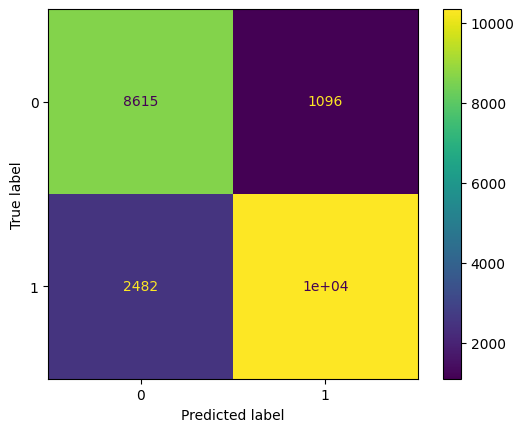

In [264]:
conf_mat = confusion_matrix(y_test, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()


In [265]:
accuracy = accuracy_score(y_test, predicted)
print(f'Accuracy: {accuracy}')

Accuracy: 0.841281107217318


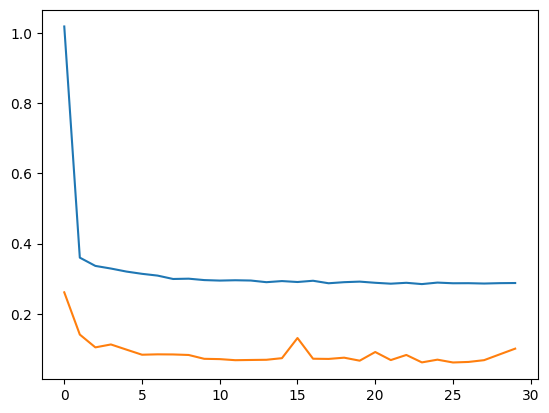

In [266]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


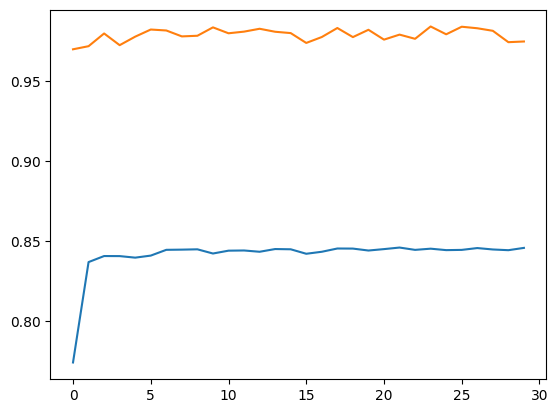

In [267]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])